### Loading and Cleaning Data

In [1]:
import pandas as pd    
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import preprocessing
from sklearn.feature_selection import RFE
import math
from statistics import mean
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
#Load your dataset. Using a relative path
import pandas as pd
dataset = pd.read_csv('beer_reviews.csv', delimiter = ',' )

Run descriptive statistics. Explain what you see.

In [3]:
#our data consists of 13 features and 1,585,614 records
dataset.shape

(1586614, 13)

In [4]:
#show a sample of the dataset
dataset.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [5]:
#describe the dataset
dataset.describe()
#
#                      *** Description of the Datasets Statistics ***
#
#    When running descrptive statistics we can see SKLearn ran descriptive statistics on 
#    the time column as well as the ID columns which has zero meaning since those columns 
#    are for identification of unique values. The standard deviations and means among the 
#    ratings columns do not have much variation between each other, however the ABV column
#    has a much higher range, 57.6, than the ranges of the beer review features, 5. We will
#    need to normalize the data later on to handle this differentiation between the features.

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


Check for missing values.

In [6]:
#are there any missing values? YES there are!
dataset.isnull().values.any()

True

In [7]:
#drop any and all rows with missing any values. 
dataset = dataset.dropna()

In [8]:
#double-check for missing values.
dataset.isnull().any()

brewery_id            False
brewery_name          False
review_time           False
review_overall        False
review_aroma          False
review_appearance     False
review_profilename    False
beer_style            False
review_palate         False
review_taste          False
beer_name             False
beer_abv              False
beer_beerid           False
dtype: bool

### Data Transformation

In [9]:
#Data normalized further down

In [10]:
#We will not be using any models that require binarized models

In [11]:
#create a dataframe for the clustering analysis
df_cluster = dataset.drop(columns=['brewery_id','review_profilename', 'review_time', 'beer_beerid'])
#take a 50% sample from our original dataset for the regression analysis
df_reg = dataset.sample(frac=.5,replace=True, random_state=0)

In [12]:
#aggreagate our cluster data on beer_name using the mean for the numerical values
cluster_df = df_cluster.groupby(['beer_name', 'brewery_name', 'beer_style', 'beer_abv']).agg({'review_overall' : np.mean, 
                                                                                'review_aroma' : np.mean,
                                                                                'review_appearance' : np.mean,
                                                                                'review_palate' : np.mean,
                                                                                'review_taste' :np.mean})

In [13]:
#set our regression's Dependent variable and independent variables for regression
#exclude non-relevant features
reg_X = df_reg.drop(columns=['brewery_id','brewery_name','beer_beerid', 'beer_name','review_profilename', 'review_overall', 'review_time', 'beer_style'])
reg_y = df_reg['review_overall']

### Modeling

### Regression

In [15]:
#divide our data using the 80/20 rule into 80% training data, 20% testing data
x_train, x_test, y_train, y_test = train_test_split(reg_X, reg_y, test_size=0.2, random_state=20)

In [16]:
#setup and fit our regression model
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#predict overall_rating based on the test data
y_pred = regressor.predict(x_test)
#normalize our independent training and testing data using a standard scaler.
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_normalized = pd.DataFrame(scaler.transform(x_train), columns = x_train.columns)
x_test_normalized = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

In [18]:
#Define a function to display our best model
def show_best_model(support_array, columns, model, test_data, test_labels):
    y_pred = model.predict(test_data.iloc[:, support_array]) #slicing the test data(COLUMNS) based on the booleans stored in the support array
    r2 = r2_score(test_labels, y_pred)
    n = len(y_pred) #size of test set
    p = len(model.coef_) #number of features
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    print('Adjusted R-squared: %.2f' % adjusted_r2)
    j = 0;
    for i in range(len(support_array)):
        if support_array[i] == True:
            print(columns[i], model.coef_[j])
            j +=1
#Define a function to get the adjusted r-squared of a model        
def get_model_r2(support_array, columns, model, test_data, test_labels):
    #set our predicted overall_rating to the prediction based on the model
    y_pred = model.predict(test_data.iloc[:, support_array])
    #get the r-squred score of the predicted y
    r2 = r2_score(test_labels, y_pred)
    n = len(y_pred) #size of test set
    p = len(model.coef_) #number of features
    #calculate and return our adjusted r-squared
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [19]:
#define our variables we will be using to run our feature selection loop
best_independent_vals = []
best_model = 0
total_improvement = 0
#loop through the code below for
#each feature in the feature set
for i in range(reg_X.shape[1]):
    #define our feature selection model object for i features
    selector = RFE(regressor, i+1, step=1) 
    #fit our data to our feature selection model
    selector.fit(x_train_normalized, y_train)
    print("--- Test Run", i+1, "---")
    #get the r-squared for this modele
    current_adjusted_r2 = get_model_r2(selector.support_, x_train.columns, selector.estimator_, x_test_normalized, y_test)
    #if this is our first pass through the loop set our best r-squared to this models r-squred
    #set the number of the best model to match the number of features in the current model
    if i == 0:
        best_r2 = current_adjusted_r2
        best_model = i + 1
    #if this isnt the first pass and there has been
    #an increase in models r-squared value by more 
    #than 1% set the best model to this model
    elif (current_adjusted_r2 - best_r2)/best_r2 >= .01:
        #delta is the change in r-squared
        delta = ((current_adjusted_r2 - best_r2)/best_r2)*100
        total_improvement = total_improvement + delta
        print("%.2f%% Impovement in r2" % delta)
        best_r2 = current_adjusted_r2
        best_model = i + 1
    #otherwise do nothing and finish current loop
    else:
        print("Less than 1% improvement in adjuested R-Squared...")
    
    #display the performance information for the current and best models.
    print("Current adjusted R-squared: %.3f" % current_adjusted_r2)
    print("Current best_r2: %.3f" % best_r2)
    print("------------------")
    #if we are on the last last loop display the best model information
    #and set the best independent values variable to the columns of 
    #the best coefficients from the training set
    if (i+1) == reg_X.shape[1]:
        print("\nThe best model is Model", best_model,"with a total improvement of %.2f%%" % total_improvement)
        print("-------------------------")
        selector = RFE(regressor, best_model, step=1) 
        selector.fit(x_train_normalized, y_train)
        show_best_model(selector.support_, x_train.columns, selector.estimator_, x_test_normalized, y_test)
        for j in range(len(selector.support_)):
            if selector.support_[j] == True:
                best_independent_vals.append(x_train.columns[j])

--- Test Run 1 ---
Current adjusted R-squared: 0.620
Current best_r2: 0.620
------------------
--- Test Run 2 ---
5.14% Impovement in r2
Current adjusted R-squared: 0.652
Current best_r2: 0.652
------------------
--- Test Run 3 ---
2.18% Impovement in r2
Current adjusted R-squared: 0.666
Current best_r2: 0.666
------------------
--- Test Run 4 ---
Less than 1% improvement in adjuested R-Squared...
Current adjusted R-squared: 0.670
Current best_r2: 0.666
------------------
--- Test Run 5 ---
Less than 1% improvement in adjuested R-Squared...
Current adjusted R-squared: 0.671
Current best_r2: 0.666
------------------

The best model is Model 3 with a total improvement of 7.32%
-------------------------
Adjusted R-squared: 0.67
review_palate 0.20405151397224608
review_taste 0.4399257067863682
beer_abv -0.08784938730159626


-------------------------
Average error: 0.00
Mean absolute error: 0.31
Mean absolute error: 0.31
Root mean squared error: 0.41
percentage absolute error: 0.09
percentage absolute error: 0.08
R-squared: 0.67
-------------------------
The coefficients for the model are...
[['review_palate' 0.20405151397224608]
 ['review_taste' 0.4399257067863682]
 ['beer_abv' -0.08784938730159626]]
The intercept for the model is...
3.824622030948763


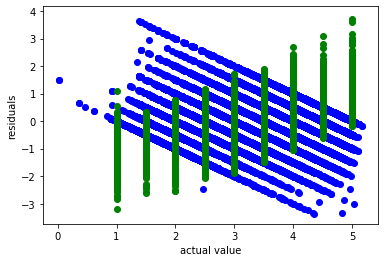

In [20]:
#Run model with best coefficients Using Non-Normalized data
best_x = df_reg[best_independent_vals]
best_x_train, best_x_test, best_y_train, best_y_test = train_test_split(best_x,reg_y,test_size=.2, random_state=20)
regressor.fit(best_x_train, best_y_train)
best_y_pred = regressor.predict(best_x_test)
#display the different error measures of the model
print("-------------------------")
print('Average error: %.2f' %mean(best_y_test - best_y_pred))
print('Mean absolute error: %.2f' %mean_absolute_error(best_y_test, best_y_pred))
print('Mean absolute error: %.2f' %(mean(abs(best_y_test - best_y_pred))))
print("Root mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print('percentage absolute error: %.2f' %mean(abs((best_y_test - best_y_pred)/best_y_test)))
print('percentage absolute error: %.2f' %(mean(abs(best_y_test - best_y_pred))/mean(best_y_test)))
print('R-squared: %.2f' % r2_score(best_y_test, best_y_pred))
print("-------------------------")
#display the coefficients and their values for the model
print("The coefficients for the model are...")
print(np.column_stack((best_x.columns, selector.estimator_.coef_)))
#display the intercept for the model
print("The intercept for the model is...")
print(selector.estimator_.intercept_)
#attempt to plot the model
plt.scatter(regressor.predict(best_x_train), best_y_train - regressor.predict(best_x_train), c='b')
plt.scatter(y_test, y_test - y_pred, c='g') 
plt.ylabel('residuals')
plt.xlabel('actual value')
plt.show()

### Clustering

In [21]:
#normalize the cluster data
scaler.fit(cluster_df)
cluster_scaled = scaler.transform(cluster_df)

In [22]:
performance_map = {}
#measure performance of models with different k values

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(cluster_scaled)
    #Record within-cluster sum-of-squares
    performance_map[k] = kmeans.inertia_
    #record Silhouette scores
print(performance_map)

{1: 244405.00000000006, 2: 121870.62352367642, 3: 87339.81013142991, 4: 72275.126338468, 5: 64605.195883489985, 6: 60187.77844866479, 7: 56739.35050791237, 8: 53697.449379292826, 9: 50864.72712527145}


TypeError: float() argument must be a string or a number, not 'dict_keys'

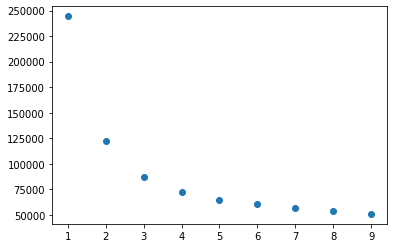

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt 
# use the elbow method to determine number of clusters
plt.scatter(performance_map.keys(),performance_map.values())
plt.plot(performance_map.keys(),performance_map.values())
plt.show()

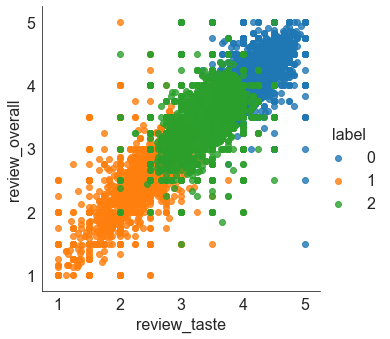

In [27]:
#Perform kmeans clustering for 3(selected from the elbow graph) clusters using the normalized data
kmeans = KMeans(n_clusters=3, random_state=0).fit(cluster_scaled)
cluster_df['label'] = kmeans.labels_
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')
#plot the Kmeans clusters
facet = sns.lmplot(data=cluster_df, x='review_taste', y='review_overall', hue='label', 
                   fit_reg=False)

In [25]:
#create a dataframe from a 45% sample of the cluster_df excluding the label column
agg_cluster = cluster_df.sample(frac=.45,random_state=1).iloc[:,:-1]
#normalize the data in agg_cluster
scaler.fit(agg_cluster)
agg_cluster_scaled = scaler.transform(agg_cluster)

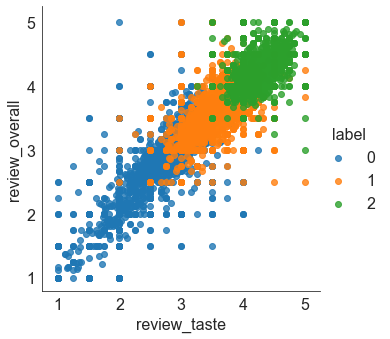

In [26]:
#Perform hierarchical clustering for 3 clusters using the normalized data
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(agg_cluster_scaled)
agg_cluster['label'] = clustering.labels_
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')
#plot the hirearchical clusters
hirearchical_facet = sns.lmplot(data=agg_cluster, x='review_taste', y='review_overall', hue='label', 
                   fit_reg=False)